In [8]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download sriramr/fruits-fresh-and-rotten-for-classification

Dataset URL: https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
License(s): unknown
 97% 3.49G/3.58G [00:40<00:05, 17.6MB/s]
100% 3.58G/3.58G [00:40<00:00, 95.3MB/s]


In [11]:
!unzip fruits-fresh-and-rotten-for-classification.zip -d fruits_data

Streaming output truncated to the last 5000 lines.
  inflating: fruits_data/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: fruits_data/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: fruits_data/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: fruits_data/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: fruits_data/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: fruits_data/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: fruits_data/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: fruits_data/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: fruits_data/dataset/train/rottenapples/rotated_by_60_Screen Shot

In [12]:
import os

base_dir = "/content/fruits_data"

for root, dirs, files in os.walk(base_dir):
    level = root.replace(base_dir, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for f in files[:3]:
        print(f"{subindent}{f}")


fruits_data/
  dataset/
    train/
      rottenoranges/
        rotated_by_45_Screen Shot 2018-06-12 at 11.35.59 PM.png
        rotated_by_15_Screen Shot 2018-06-12 at 11.23.03 PM.png
        rotated_by_45_Screen Shot 2018-06-12 at 11.32.17 PM.png
      freshoranges/
        saltandpepper_Screen Shot 2018-06-13 at 12.05.19 AM.png
        rotated_by_45_Screen Shot 2018-06-12 at 11.58.43 PM.png
        rotated_by_60_Screen Shot 2018-06-13 at 12.06.15 AM.png
      freshbanana/
        rotated_by_60_Screen Shot 2018-06-12 at 9.56.48 PM.png
        rotated_by_75_Screen Shot 2018-06-12 at 10.04.59 PM.png
        rotated_by_15_Screen Shot 2018-06-12 at 10.02.19 PM.png
      rottenapples/
        Screen Shot 2018-06-08 at 2.33.49 PM.png
        rotated_by_30_Screen Shot 2018-06-07 at 2.59.13 PM.png
        rotated_by_75_Screen Shot 2018-06-08 at 2.35.25 PM.png
      freshapples/
        rotated_by_45_Screen Shot 2018-06-08 at 5.07.32 PM.png
        rotated_by_45_Screen Shot 2018-06-08 at 5.03.

In [13]:
from collections import Counter

class_counts = Counter()
for subdir, dirs, files in os.walk(base_dir):
    if len(files) > 0:
        label = os.path.basename(subdir)
        class_counts[label] += len(files)

for cls, count in class_counts.items():
    print(f"{cls:25s} --> {count} images")


rottenoranges             --> 3996 images
freshoranges              --> 3708 images
freshbanana               --> 3924 images
rottenapples              --> 5886 images
freshapples               --> 4176 images
rottenbanana              --> 5508 images


In [14]:


source_train_dir = "/content/fruits_data/dataset/dataset/train"
source_test_dir = "/content/fruits_data/dataset/dataset/test"


target_base_dir = "/content/fruits_subset"
target_train_dir = os.path.join(target_base_dir, "train")
target_test_dir = os.path.join(target_base_dir, "test")

os.makedirs(target_train_dir, exist_ok=True)
os.makedirs(target_test_dir, exist_ok=True)

def copy_subset(source_dir, target_dir, num_images):
    os.makedirs(target_dir, exist_ok=True)
    all_images = os.listdir(source_dir)
    selected = random.sample(all_images, min(num_images, len(all_images)))
    for img in selected:
        shutil.copy(os.path.join(source_dir, img), os.path.join(target_dir, img))

train_limit = 350
test_limit = 50

classes = os.listdir(source_train_dir)

for cls in classes:
    print(f"Processing {cls}...")
    src_train = os.path.join(source_train_dir, cls)
    src_test = os.path.join(source_test_dir, cls)
    tgt_train = os.path.join(target_train_dir, cls)
    tgt_test = os.path.join(target_test_dir, cls)


    copy_subset(src_train, tgt_train, train_limit)
    copy_subset(src_test, tgt_test, test_limit)

print("\n Dataset subset created successfully!")


Processing rottenoranges...
Processing freshoranges...
Processing freshbanana...
Processing rottenapples...
Processing freshapples...
Processing rottenbanana...

 Dataset subset created successfully!


In [15]:
from collections import Counter

counts = Counter()
for root, dirs, files in os.walk(target_base_dir):
    if len(files) > 0:
        label = os.path.basename(root)
        counts[label] += len(files)

for label, count in counts.items():
    print(f"{label:20s} --> {count} images")


rottenoranges        --> 400 images
freshoranges         --> 400 images
freshbanana          --> 400 images
rottenapples         --> 400 images
freshapples          --> 400 images
rottenbanana         --> 400 images


Classes: ['rottenoranges', 'freshoranges', 'freshbanana', 'rottenapples', 'freshapples', 'rottenbanana']


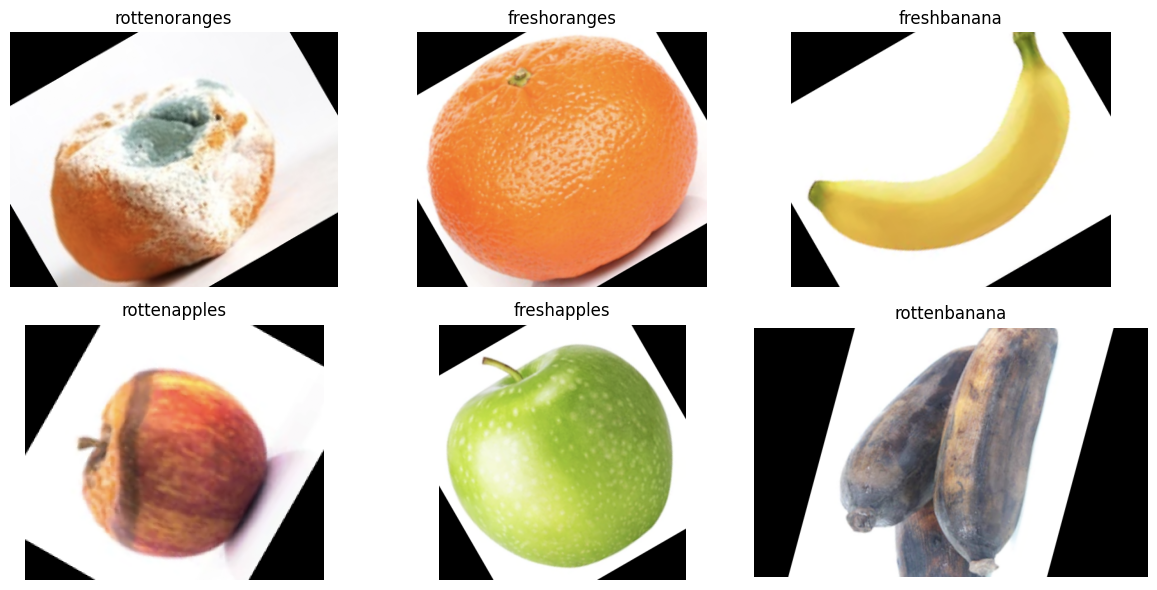

In [16]:



data_dir = "/content/fruits_subset/train"


classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print("Classes:", classes)


sample_images = []
for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    img_file = random.choice(os.listdir(cls_path))
    sample_images.append(os.path.join(cls_path, img_file))

plt.figure(figsize=(12, 6))
for i, img_path in enumerate(sample_images):
    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(os.path.basename(os.path.dirname(img_path)))
    plt.axis('off')

plt.tight_layout()
plt.show()


In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/fruits_subset/train"
test_dir = "/content/fruits_subset/test"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 2100 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,310 (12.61 MB)

 Trainable params: 3,305,862 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
EPOCHS = 15

history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=EPOCHS
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 31s 339ms/step - accuracy: 0.5341 - loss: 3.2970 - val_accuracy: 0.2333 - val_loss: 6.8929
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 243ms/step - accuracy: 0.6571 - loss: 1.0265 - val_accuracy: 0.1667 - val_loss: 11.7127
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 243ms/step - accuracy: 0.7360 - loss: 1.0642 - val_accuracy: 0.1667 - val_loss: 11.8958
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 254ms/step - accuracy: 0.7681 - loss: 0.8710 - val_accuracy: 0.2700 - val_loss: 5.4304
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step - accuracy: 0.7664 - loss: 0.7091 - val_accuracy: 0.4100 - val_loss: 4.1122
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 255ms/step - accuracy: 0.7885 - loss: 0.7089 - val_accuracy: 0.5000 - val_loss: 1.6466
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 241ms/step - accuracy: 0.7710 - loss: 0.7129 - val_accuracy: 0.6633 - val_loss: 1.3605
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 241ms/step - accuracy: 0.7777 - loss: 0.7605 - val_ac

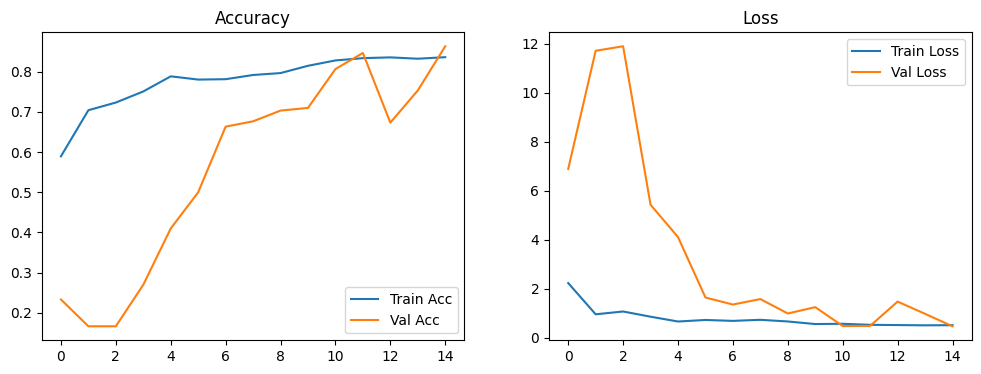

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.8504 - loss: 0.4423
Test Accuracy: 86.33%
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step

Classification Report:

               precision    recall  f1-score   support

  freshapples       0.89      0.82      0.85        50
  freshbanana       0.96      0.86      0.91        50
 freshoranges       0.95      0.84      0.89        50
 rottenapples       0.64      0.86      0.74        50
 rottenbanana       0.93      1.00      0.96        50
rottenoranges       0.91      0.80      0.85        50

     accuracy                           0.86       300
    macro avg       0.88      0.86      0.87       300
 weighted avg       0.88      0.86      0.87       300



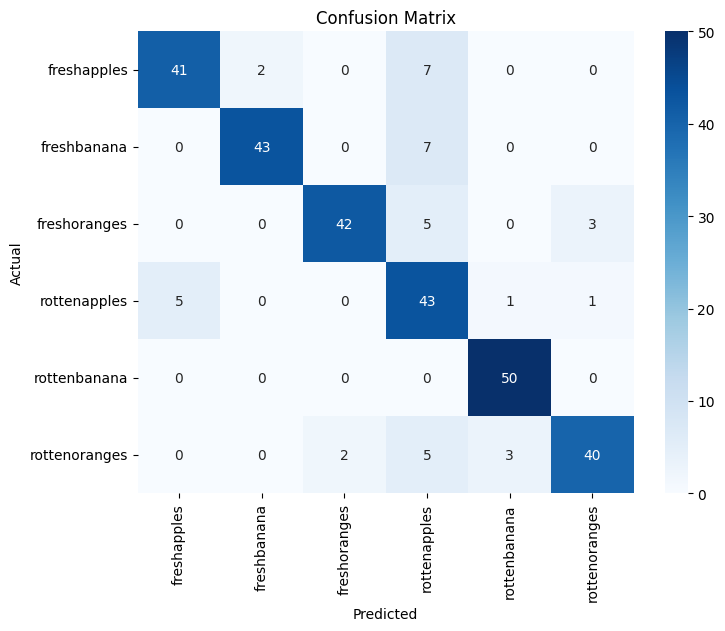

In [21]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate
loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc*100:.2f}%")

# Predictions
preds = np.argmax(model.predict(test_gen), axis=1)
true = test_gen.classes
labels = list(test_gen.class_indices.keys())

print("\nClassification Report:\n")
print(classification_report(true, preds, target_names=labels))

# Confusion matrix
cm = confusion_matrix(true, preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


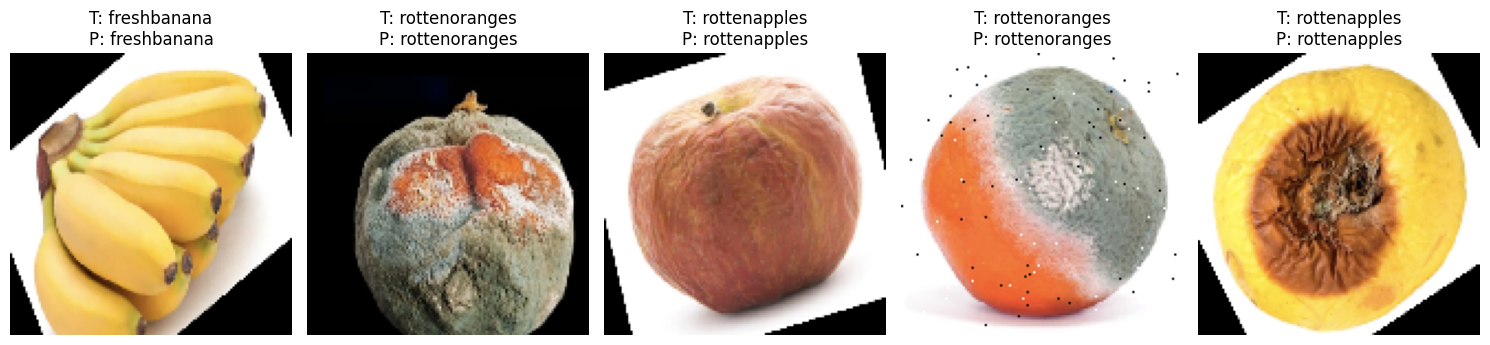

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import os
import tensorflow as tf

# Test dataset path
test_dir = "/content/fruits_subset/test"
classes = [d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]

# Select 5 random images
sample_images = []
for _ in range(5):
    cls = random.choice(classes)
    img_file = random.choice(os.listdir(os.path.join(test_dir, cls)))
    sample_images.append((os.path.join(test_dir, cls, img_file), cls))

plt.figure(figsize=(15,5))

for i, (img_path, true_cls) in enumerate(sample_images):
    # Load and preprocess image
    img = tf.keras.utils.load_img(img_path, target_size=(128,128))
    img_array = tf.keras.utils.img_to_array(img)
    img_array_exp = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    preds = model.predict(img_array_exp, verbose=0)
    pred_cls = list(train_gen.class_indices.keys())[np.argmax(preds)]

    # Plot
    plt.subplot(1,5,i+1)
    plt.imshow(img_array.astype('uint8'))
    plt.title(f"T: {true_cls}\nP: {pred_cls}")
    plt.axis('off')

plt.tight_layout()
plt.show()
